In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# pd option to only show 6 rows instead
pd.set_option("display.max_rows",6)


In [3]:
"""
Created on Sun Apr  19th.

Script for lesson 5 of "Friends of Tracking" #FoT

Data can also be found at: https://github.com/metrica-sports/sample-data

Accompanying video tutorials can be found here: https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w

GitHub repo: https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
@author: Laurie Shaw (@EightyFivePoint)
"""

# As did in lesson 4, first set up my initial path to data:

DATADIR = r'C:\Users\Konstantinos\LaurieOnTracking\sample_metrica_data\games'

# let's look at sample match 2:
game_id = 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

# And of course, reading TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [4]:
# Convert positions from metrica units to meters 
# note change in Metrica's coordinate system since the last lesson (OK! change made in Metrica_IO.py)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [5]:
# reverse direction of play in the second half so that home team is always attacking from right to left (<--)
# (no change need in Metrica_IO.py, function was already set up in this way)
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

<h3> 1. Making a movie (example used - 2nd home team goal) </h3>

In [6]:
# Making a movie of the second home team goal

#first, where to save the movie (same DIR set up before)
PLOTDIR = DATADIR

mviz.save_match_clip(tracking_home.iloc[73600:73600+500],tracking_away.iloc[73600:73600+500],
                     PLOTDIR,fname='home_goal_2',include_player_velocities=False)

# And when movie is done... look within the games folder (my DIR)

Generating movie...done


<h3> 2. Measuring players speed </h3>

In [7]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True) # as you can see smoothing is set to True
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True)

C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_

C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_

C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:191: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\Konstantinos\Anaconda3\lib\site-packages\scipy\signal\_

In [8]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141154,2,5646.16,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,0.913685,0.0,0.0,0.0,NaN,NaN,NaN,1.533214,0.979929,1.819617
141155,2,5646.20,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,0.803857,0.0,0.0,0.0,NaN,NaN,NaN,1.521857,0.978714,1.809401
141156,2,5646.24,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,0.733244,0.0,0.0,0.0,NaN,NaN,NaN,1.510500,0.977500,1.799199


(<matplotlib.figure.Figure at 0x25dc2e8f198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25dc2e8f6a0>)

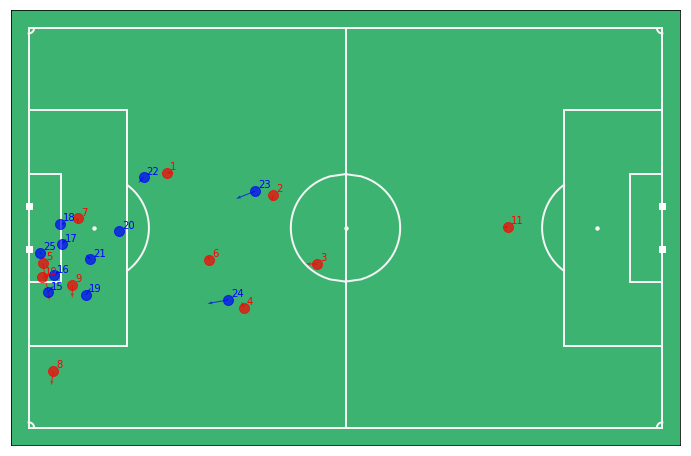

In [9]:
# plot a random frame, plotting the player velocities using quivers
mviz.plot_frame( tracking_home.loc[10000], tracking_away.loc[10000], include_player_velocities=True, annotate=True)

<h3> 3. Physical report/ summary for players of the Home team </h3>

In [10]:
# Create a Physical summary dataframe for home players
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
# c.split('_')[1] identifies the jersey number for each plr in the tracking data

# and then creates a new df where each ROW is a player (index = player; rather than an instant in the game):
home_summary = pd.DataFrame(index=home_players)

In [11]:
home_summary

""
1
10
11
...
7
8
9


<h4> I. minutes played </h4>

In [12]:
# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player 
    # (when a player is not on the pitch positions are NaN)
    
    # use player x-position coordinate:
    column = 'Home_' + player + '_x'
    
    player_minutes = ( tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
    
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)

In [13]:
home_summary

,Minutes Played
1,94.104000
11,94.104000
2,94.104000
...,...
12,30.302667
13,23.364000
14,10.279333


<h4> II. distance covered </h4>

In [14]:
# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

In [15]:
home_summary

,Minutes Played,Distance [km]
1,94.104000,10.370192
11,94.104000,5.204252
2,94.104000,9.845407
...,...,...
12,30.302667,3.036616
13,23.364000,2.369927
14,10.279333,1.088033


(<matplotlib.figure.Figure at 0x25dc2ebe860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25dc2e8f320>)

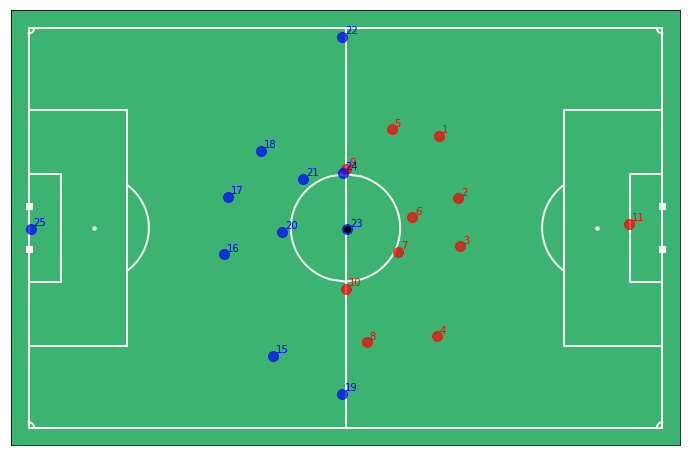

In [16]:
# In case we want to have a look at plr positions (roles) to understand/ explain better the results above,
# plot positions at KO (to find out what position each player is playing)
mviz.plot_frame( tracking_home.loc[51], tracking_away.loc[51], include_player_velocities=False, annotate=True)

# e.g. no 11 is the GK of the home team (only 5.2 km in the game, unsurprisingly)

Text(0,0.5,'Distance covered [km]')

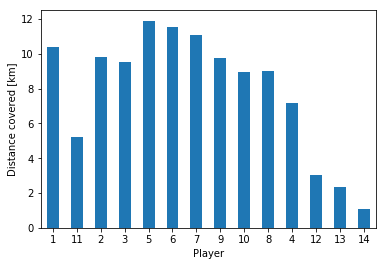

In [17]:
# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

<h4> III. Different speeds (i.e. type of runs; (A) walking, (B) jogging, (C) running, (D) sprinting, (E) high intensity sprinting) </h4>

In [18]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
hi_sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home.loc[tracking_home[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 5.5 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 5.5), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (between 5.5 and 7 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 5.5) & (tracking_home[column] < 7), column].sum()/25./1000
    sprinting.append( player_distance )
    # high intensity sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[ tracking_home[column] >= 7, column].sum()/25./1000
    hi_sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting
home_summary['HI Sprinting [km]'] = hi_sprinting

In [19]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],HI Sprinting [km]
1,94.104000,10.370192,3.701989,4.436273,1.635675,0.513543,0.082712
11,94.104000,5.204252,4.394909,0.777970,0.028451,0.001204,0.001718
2,94.104000,9.845407,4.086044,4.066061,1.356765,0.255725,0.080811
...,...,...,...,...,...,...,...
12,30.302667,3.036616,1.140396,1.034231,0.559918,0.259178,0.042892
13,23.364000,2.369927,0.874109,0.858117,0.419399,0.162098,0.056203
14,10.279333,1.088033,0.436696,0.402641,0.200043,0.035663,0.012990


Text(0,0.5,'Distance covered [m]')

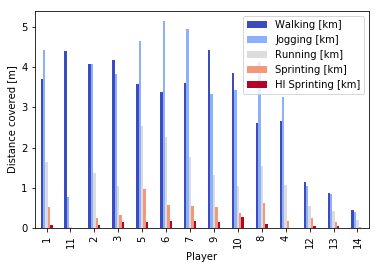

In [20]:
# make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]', 'HI Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

<h4> III E. number of high intensity <u> sustained </u> sprints </h4>

In [21]:
'''
sustained sprints: 
how many sustained sprints per match did each player complete? 
Defined as maintaining a speed > 7 m/s for at least 1 second
'''
n_hi_sprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and 
    # find number of occassions that sprint was sustained for at least one window length!
    # diff (again) helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), 
                                              np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    
    n_hi_sprints.append( np.sum( player_sprints == 1 ) )
    
home_summary['# high intensity sprints'] = n_hi_sprints

In [22]:
home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],HI Sprinting [km],# high intensity sprints
1,94.104000,10.370192,3.701989,4.436273,1.635675,0.513543,0.082712,5
11,94.104000,5.204252,4.394909,0.777970,0.028451,0.001204,0.001718,0
2,94.104000,9.845407,4.086044,4.066061,1.356765,0.255725,0.080811,3
...,...,...,...,...,...,...,...,...
12,30.302667,3.036616,1.140396,1.034231,0.559918,0.259178,0.042892,2
13,23.364000,2.369927,0.874109,0.858117,0.419399,0.162098,0.056203,2
14,10.279333,1.088033,0.436696,0.402641,0.200043,0.035663,0.012990,1


<h4> (further in (E)) Where these high intensity sprints occured (example with player 10 that had quite a few HI sprints) </h4>

In [23]:
# Plot the trajectories for each of player 10's (distinct) sprints
player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position

# same trick as before to find start and end indices of windows of size 'sprint_window' in which 
# player speed was above the sprint_threshold:
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home[column]>=sprint_threshold), 
                                          np.ones(sprint_window), mode='same' ) >= sprint_window ) )

# adding sprint_window/2 because of the way that the convolution is centred:
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1


In [24]:
# if you want to see the list with those sprints, 
print(player_sprints_start) # each of which corresponds to 
                            # the period the player started the HI sprint
    
# we can do the same for where each of those sprints ended:
# print(player_sprints_end) # and essentially get the frame where it started & ended each of those sprints

# e.g. 1st sprint from 16301 to 16436, and so on

[ 16301  20977  34805  37380  51704  61245  73660  81180  83622  89387
 104002 109524 124176]


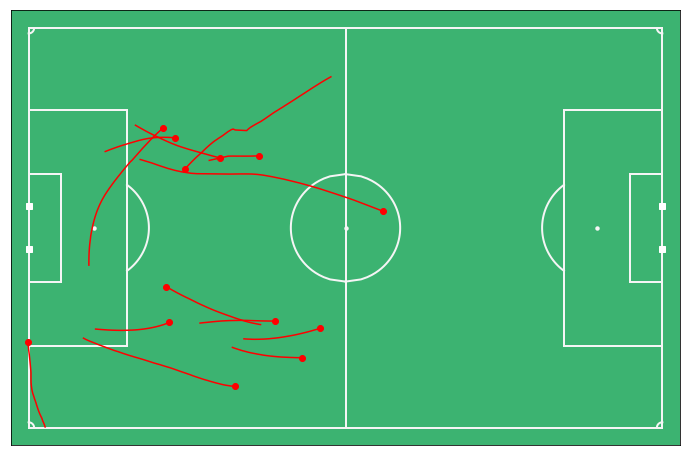

In [25]:
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home[column_x].iloc[s],tracking_home[column_y].iloc[s],'ro')
    ax.plot(tracking_home[column_x].iloc[s:e+1],tracking_home[column_y].iloc[s:e+1],'r')